In [2]:
import pickle
from typing import Optional, Tuple
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

In [3]:
affordance_shapes = pickle.load(open("./affordance_segments.pickle", "rb"))

In [4]:
affordance_shapes.keys()

dict_keys(['grasp', 'contain', 'lift', 'openable', 'layable', 'support', 'sittable', 'wrap_grasp', 'pourable', 'move', 'displaY', 'pushable', 'pull', 'listen', 'wear', 'press', 'cut', 'stab'])

In [5]:
a_chair = affordance_shapes['sittable'][1][3089]

In [6]:
def plot_point_cloud(point_cloud_array,color: bool = False, grid_size: int = 4,  
                     fixed_bounds: Optional[Tuple[Tuple[float, float, float], Tuple[float, float, float]]] = (
        (-0.75, -0.75, -0.75),
        (0.75, 0.75, 0.75)),affordance_array=None):
    """
    Render a point cloud as a plot to the given image path.

    :param pc: the PointCloud to plot.
    :param image_path: the path to save the image, with a file extension.
    :param color: if True, show the RGB colors from the point cloud.
    :param grid_size: the number of random rotations to render.
    """
    fig = plt.figure(figsize=(8, 8))

    for i in range(grid_size):
        for j in range(grid_size):
            ax = fig.add_subplot(grid_size, grid_size, 1 + j + i * grid_size, projection="3d")
            color_args = {}
            # color_args['c'] = []
            # for p in affordance_array:
            #     if p > 0.2:
            #         color_args['c'].append([1,0,0])
            #     else:
            #         color_args['c'].append([0,0,1])
#             if color:
#                 color_args["c"] = np.stack(
#                     [pc.channels["R"], pc.channels["G"], pc.channels["B"]], axis=-1
#                 )
            c = point_cloud_array

            if grid_size > 1:
                theta = np.pi * 2 * (i * grid_size + j) / (grid_size**2)
                rotation = np.array(
                    [
                        [np.cos(theta), -np.sin(theta), 0.0],
                        [np.sin(theta), np.cos(theta), 0.0],
                        [0.0, 0.0, 1.0],
                    ]
                )
                c = c @ rotation

            ax.scatter(c[:, 0], c[:, 1], c[:, 2], **color_args)

            # if fixed_bounds is None:
            #     min_point = c.min(0)
            #     max_point = c.max(0)
            #     size = (max_point - min_point).max() / 2
            #     center = (min_point + max_point) / 2
            #     ax.set_xlim3d(center[0] - size, center[0] + size)
            #     ax.set_ylim3d(center[1] - size, center[1] + size)
            #     ax.set_zlim3d(center[2] - size, center[2] + size)
            # else:
            #     ax.set_xlim3d(fixed_bounds[0][0], fixed_bounds[1][0])
            #     ax.set_ylim3d(fixed_bounds[0][1], fixed_bounds[1][1])
            #     ax.set_zlim3d(fixed_bounds[0][2], fixed_bounds[1][2])

    return fig

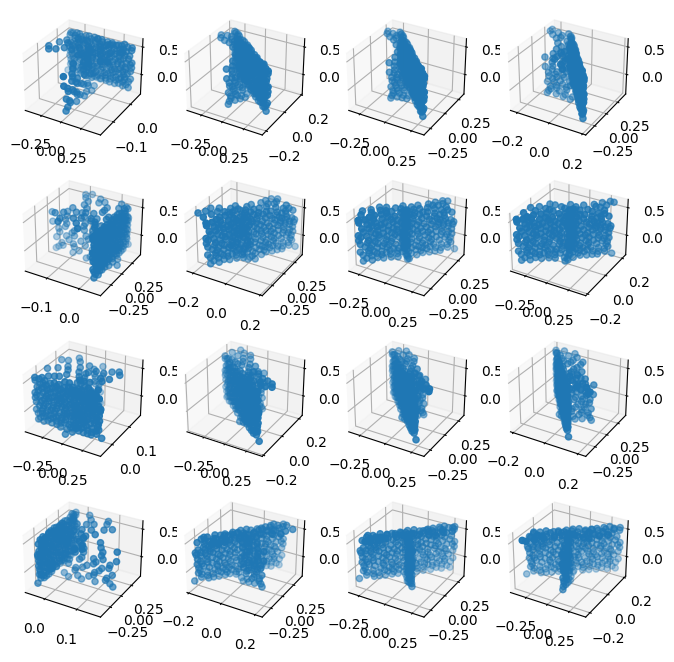

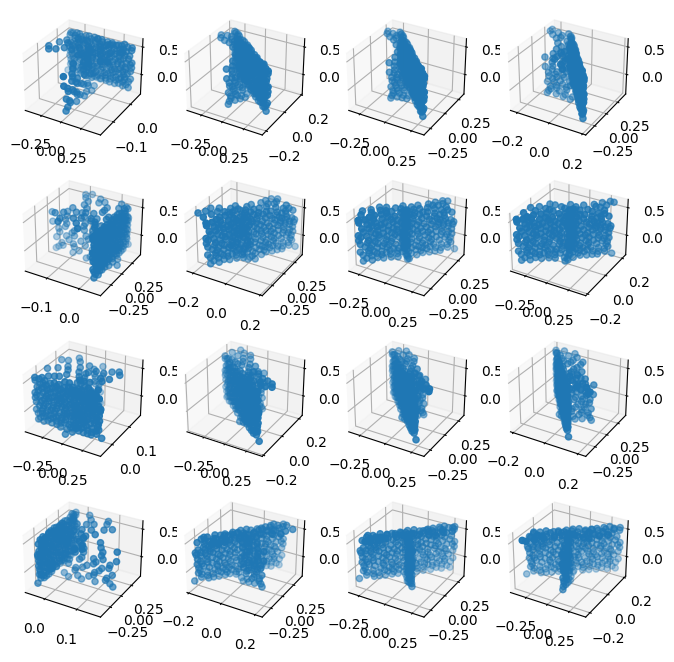

In [7]:
plot_point_cloud(a_chair)

In [8]:
point_cloud = pv.PolyData(a_chair)
point_cloud

PolyData,Information
N Cells,276
N Points,276
N Strips,0
X Bounds,"-4.035e-01, 4.203e-01"
Y Bounds,"-1.555e-01, 4.829e-02"
Z Bounds,"-3.050e-01, 5.810e-01"
N Arrays,0


In [9]:
surf = point_cloud.reconstruct_surface(nbr_sz=10)

In [11]:
pl = pv.Plotter(shape=(1, 1))
pl.add_mesh(surf, color=True, show_edges=True)

Actor (0x7f8b8a622aa0)
  Center:                     (-0.037323787808418274, -0.11484614759683609, 0.06124459207057953)
  Pickable:                   True
  Position:                   (0.0, 0.0, 0.0)
  Scale:                      (1.0, 1.0, 1.0)
  Visible:                    True
  X Bounds                    -5.663E-01, 4.917E-01
  Y Bounds                    -3.183E-01, 8.861E-02
  Z Bounds                    -4.677E-01, 5.902E-01
  User matrix:                Unset
  Has mapper:                 True

Property (0x7f8b8a623340)
  Ambient:                     0.0
  Ambient color:               Color(name='lightblue', hex='#add8e6ff', opacity=255)
  Anisotropy:                  0.0
  Color:                       Color(name='lightblue', hex='#add8e6ff', opacity=255)
  Culling:                     "none"
  Diffuse:                     1.0
  Diffuse color:               Color(name='lightblue', hex='#add8e6ff', opacity=255)
  Edge color:                  Color(name='black', hex='#000000ff'

In [15]:
surf.save("chair_obj.stl", binary=False)

In [1]:
point_cloud.plot()

NameError: name 'point_cloud' is not defined

In [18]:
ms = pymeshlab.MeshSet()
new_mesh = load_new_mesh('./chair_obj.stl')
ms.save_current_mesh("./chair_obj.obj")


NameError: name 'pymeshlab' is not defined

In [35]:
ms.compute_normal_for_point_clouds()

In [17]:
ms.save_current_mesh('chair_sittable_1.obj')

In [37]:
ms.current_mesh().is_point_cloud()

True